# Classifying Newswires Multiclass Classification

## Importing required modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import reuters

(train_data,train_labels) , (test_data,test_labels) = reuters.load_data(num_words = 10000)

In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for  (key,value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [ ]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

## Preparing the data

In [ ]:
# Vectorizing the data as binary values
def vectorize_sequences(sequences,dimensions = 10000):
  results = np.zeros((len(sequences),dimensions))
  for i ,sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
# one hoy encoding the train and test labels
def to_one_hot(labels,dimensions = 46):
  results = np.zeros((len(labels),dimensions))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

## Building the neural networks

In [ ]:
from keras.utils.np_utils import to_categorical
from keras import layers
from keras import models

In [ ]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64,activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(46,activation = 'softmax'))

In [ ]:
model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

In [ ]:
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

## Fitting the model

In [ ]:
history = model.fit(partial_x_train,partial_y_train,epochs=20, batch_size=512,
                    validation_data = (x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 49ms/step - loss: 2.6042 - accuracy: 0.5262 - val_loss: 1.7331 - val_accuracy: 0.6360
Epoch 2/20
16/16 [==============================] - 1s 41ms/step - loss: 1.4342 - accuracy: 0.7008 - val_loss: 1.3148 - val_accuracy: 0.7100
Epoch 3/20
16/16 [==============================] - 1s 43ms/step - loss: 1.0687 - accuracy: 0.7759 - val_loss: 1.1466 - val_accuracy: 0.7470
Epoch 4/20
16/16 [==============================] - 1s 41ms/step - loss: 0.8414 - accuracy: 0.8227 - val_loss: 1.0356 - val_accuracy: 0.7740
Epoch 5/20
16/16 [==============================] - 1s 41ms/step - loss: 0.6702 - accuracy: 0.8583 - val_loss: 0.9662 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 1s 41ms/step - loss: 0.5380 - accuracy: 0.8896 - val_loss: 0.9157 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 1s 41ms/step - loss: 0.4291 - accuracy: 0.9104 - val_loss: 0.8906 - val_accuracy: 0.8110
Epoch 8/20
16

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Visualizing the performance of the neural network

In [ ]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)

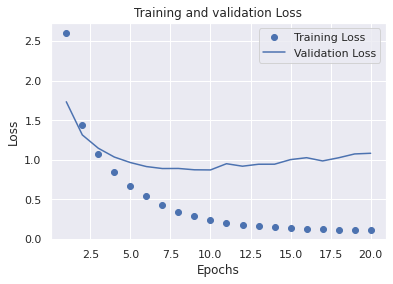

In [ ]:
plt.plot(epochs, loss_values,'bo', label = 'Training Loss')
plt.plot(epochs, val_loss_values,'b', label = 'Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

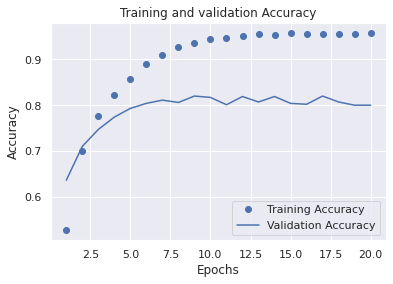

In [ ]:
plt.plot(epochs, acc_values,'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc_values,'b', label = 'Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Retraining the model for better performance

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64,activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(46,activation = 'softmax'))

In [ ]:
model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
history = model.fit(partial_x_train,partial_y_train,epochs=9, batch_size=512,
                    validation_data = (x_val,y_val))

Epoch 1/9
16/16 [==============================] - 1s 49ms/step - loss: 2.3475 - accuracy: 0.5160 - val_loss: 1.6041 - val_accuracy: 0.6420
Epoch 2/9
16/16 [==============================] - 1s 41ms/step - loss: 1.3422 - accuracy: 0.7058 - val_loss: 1.2756 - val_accuracy: 0.7110
Epoch 3/9
16/16 [==============================] - 1s 41ms/step - loss: 1.0248 - accuracy: 0.7769 - val_loss: 1.1386 - val_accuracy: 0.7450
Epoch 4/9
16/16 [==============================] - 1s 42ms/step - loss: 0.8064 - accuracy: 0.8261 - val_loss: 1.0243 - val_accuracy: 0.7710
Epoch 5/9
16/16 [==============================] - 1s 41ms/step - loss: 0.6344 - accuracy: 0.8656 - val_loss: 0.9475 - val_accuracy: 0.7940
Epoch 6/9
16/16 [==============================] - 1s 41ms/step - loss: 0.4993 - accuracy: 0.8936 - val_loss: 0.8979 - val_accuracy: 0.8100
Epoch 7/9
16/16 [==============================] - 1s 41ms/step - loss: 0.3970 - accuracy: 0.9173 - val_loss: 0.9364 - val_accuracy: 0.7850
Epoch 8/9
16/16 [===

In [ ]:
results = model.evaluate(x_test,one_hot_test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 0.9959 - accuracy: 0.7823


In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions.shape

(2246, 46)